In [241]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [242]:
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

In [243]:
# Read the CSV file
df = pd.read_csv(os.path.join(path, "Original", 'Dataset-weather-prediction-dataset-processed.csv'))
df_ans= pd.read_csv(os.path.join(path, "Original", 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
df_cleaned=pd.read_csv(os.path.join(path, 'Prepared', 'df_cleaned.csv' ))

In [244]:

df_cleaned.drop(columns=['Unnamed: 0'])

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,Year,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,0.45,0.34,4.7,8.5,6.0,10.9,1960,8,1.0304,0.98
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,0.25,0.84,0.7,8.9,5.6,12.1,1960,6,1.0292,0.62
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,0.17,0.08,0.1,10.5,8.1,12.9,1960,8,1.0320,0.69
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,0.13,0.98,0.0,7.4,7.3,10.6,1960,6,1.0443,0.98
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,0.46,0.00,5.7,5.7,3.0,8.4,1960,7,1.0430,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,1.13,0.41,3.4,10.7,7.9,13.5,2022,4,1.0263,0.98
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,1.13,0.41,3.4,10.7,7.9,13.5,2022,3,1.0263,1.00
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,1.13,0.41,3.4,10.7,7.9,13.5,2022,3,1.0263,0.85
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,1.13,0.41,3.4,10.7,7.9,13.5,2022,3,1.0263,0.94


# Wrangle
Seperate into Station

In [245]:
# Drop the specified columns from df_ans_filtered and df_filtered
df_ans_filtered = df_ans.drop(columns=['DATE'])
df_cleaned = df_cleaned.drop(columns=['DATE', 'MONTH'])

In [246]:
Station = 'STOCKHOLM'

In [247]:
# Filter columns that contain 'BASEL' followed by '_observations'
df_filtered = df_cleaned.loc[:, df_cleaned.columns.str.contains(Station)]

# Display the filtered DataFrame
print(df_filtered)

       BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0                      7            0.85          1.0180   
1                      6            0.84          1.0180   
2                      8            0.90          1.0180   
3                      3            0.92          1.0180   
4                      6            0.95          1.0180   
...                  ...             ...             ...   
22945                  1            0.79          1.0248   
22946                  6            0.77          1.0244   
22947                  4            0.76          1.0227   
22948                  5            0.80          1.0212   
22949                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   

In [248]:
# Filter columns that contain 'BASEL' followed by '_observations'
df_ans_filtered = df_ans.loc[:, df_ans.columns.str.contains(Station)]

# Display the filtered DataFrame
print(df_ans_filtered)

       BASEL_pleasant_weather
0                           0
1                           0
2                           0
3                           0
4                           0
...                       ...
22945                       0
22946                       0
22947                       0
22948                       0
22949                       0

[22950 rows x 1 columns]


In [249]:
df_filtered

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,10.9
1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,10.1
2,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,9.9
3,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,10.6
4,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,6.0
...,...,...,...,...,...,...,...,...,...
22945,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,21.4
22946,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,21.9
22947,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,22.4
22948,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,21.1


In [250]:
df_ans_filtered.head(10)

,BASEL_pleasant_weather
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [251]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_filtered
y = df_ans_filtered

In [252]:
X.shape

(22950, 9)

In [253]:
y.shape

(22950, 1)

# Split

In [254]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [255]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [256]:
# Example of downsampling
#X_train_small = X_train[:10000]  # Use only the first 10,000 samples for training
#y_train_small = y_train[:10000]

# Random Tree Forest

In [257]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators=25, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

c:\Users\Oa\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=25)

In [258]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9995642701525055


In [259]:
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

y_test shape: (4590, 1)
y_pred shape: (4590,)


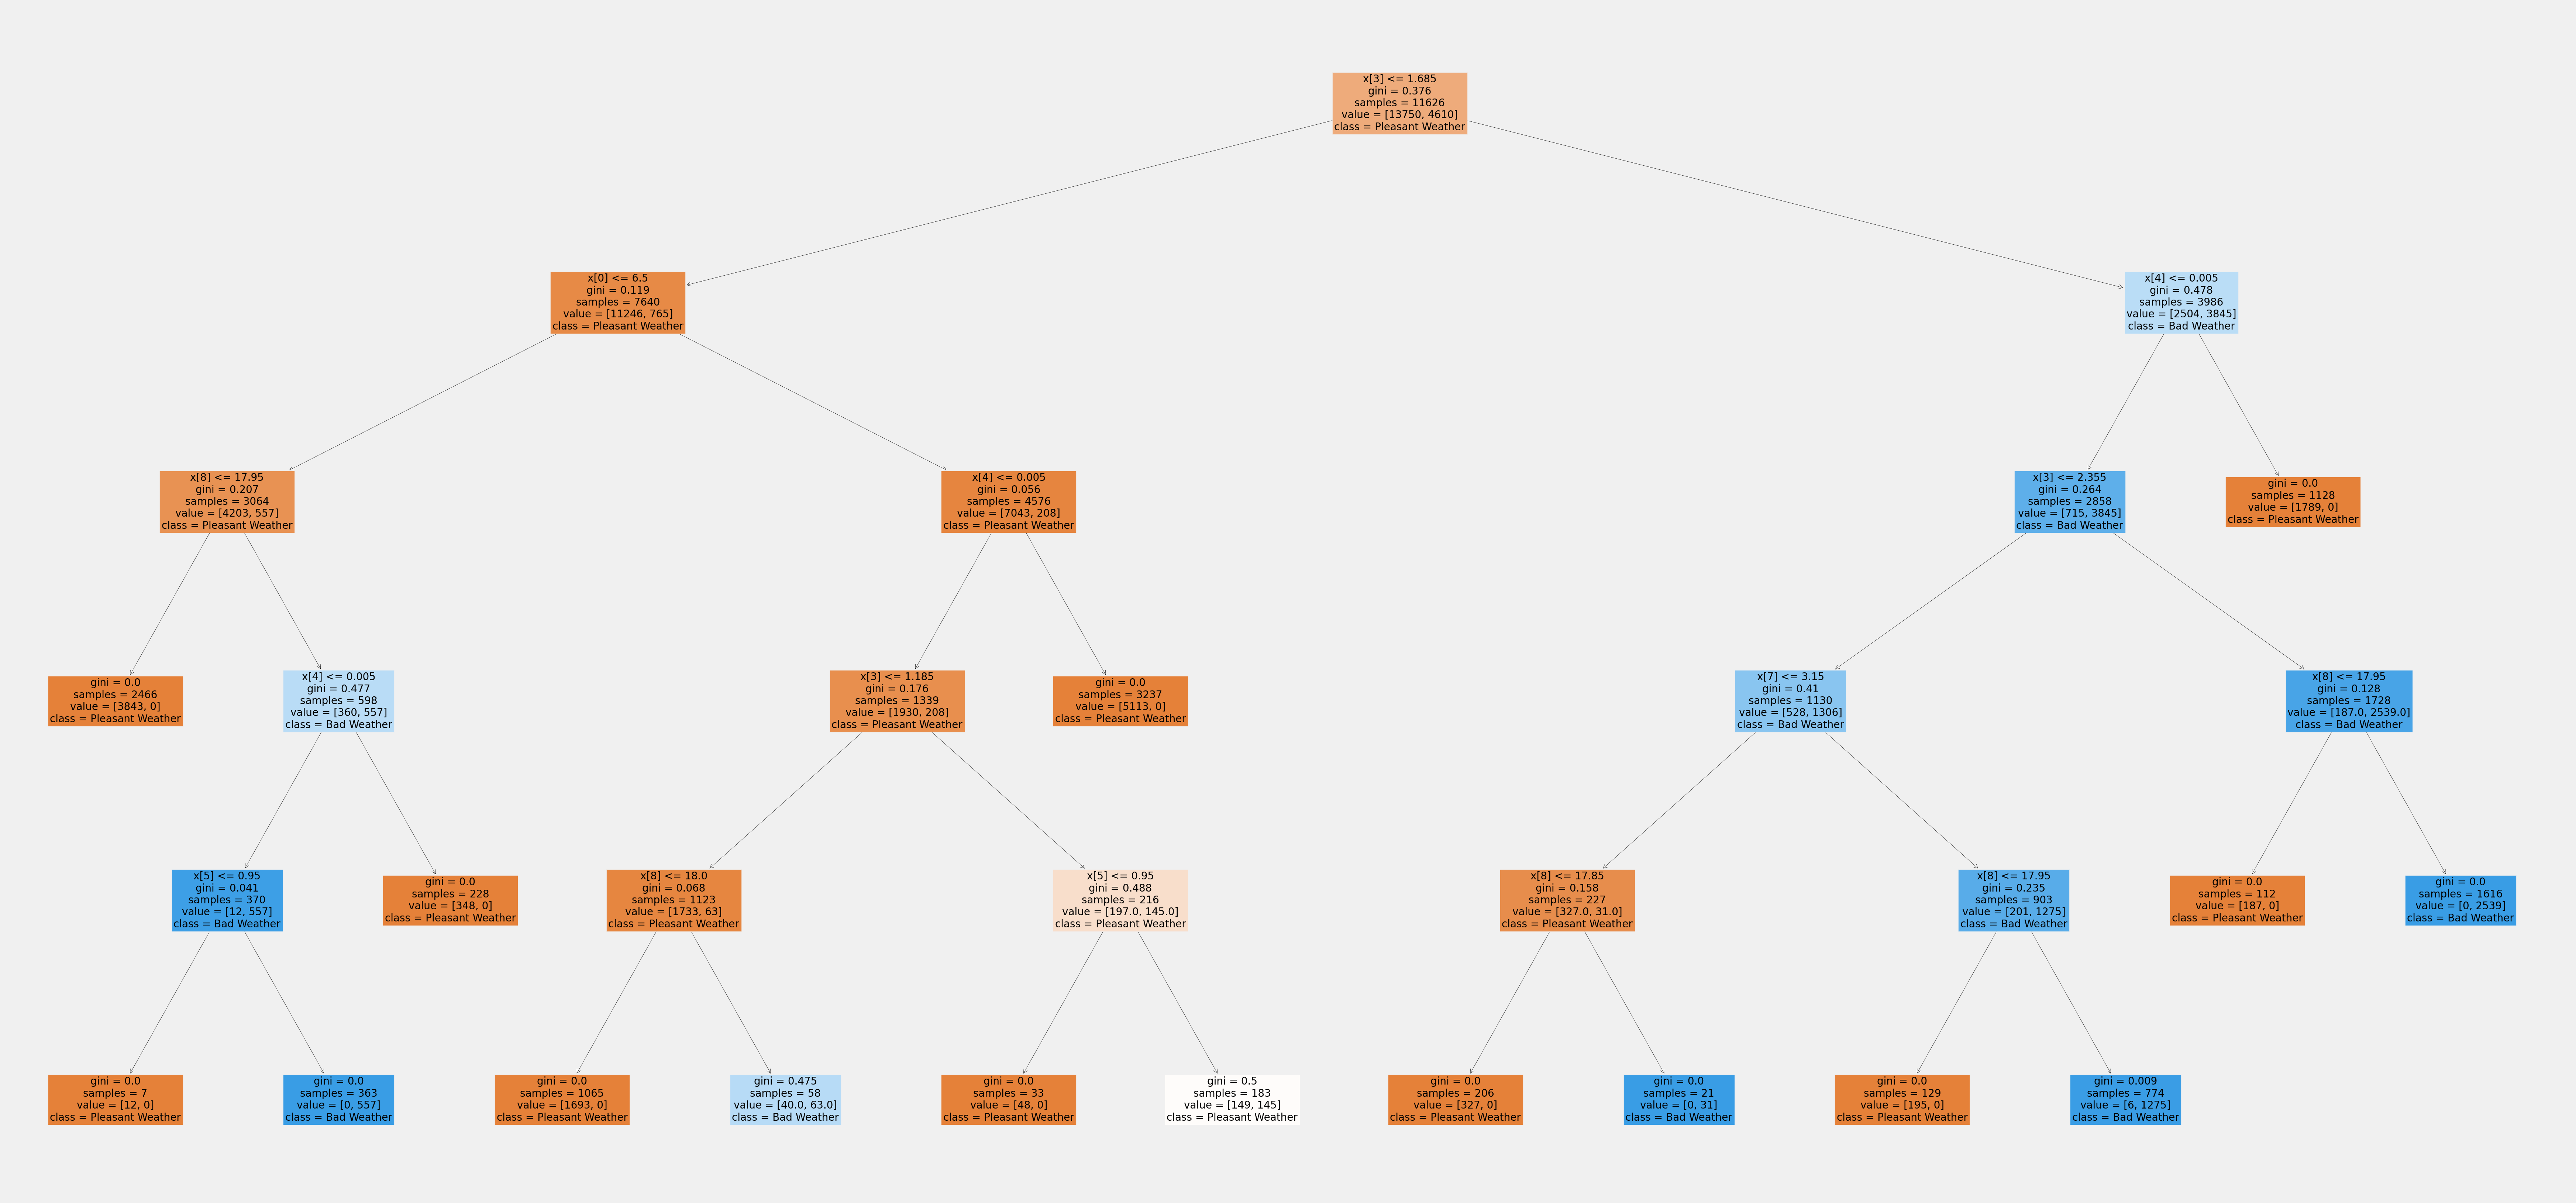

In [260]:
types = {0:'Pleasant Weather', 1:'Bad Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[5], fontsize = 20, class_names=types, filled=True);

In [261]:
path2 = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project'

In [262]:
fig.savefig(os.path.join(path2, 'Visual Assets', f'random_forest_{Station}.png'),bbox_inches='tight')

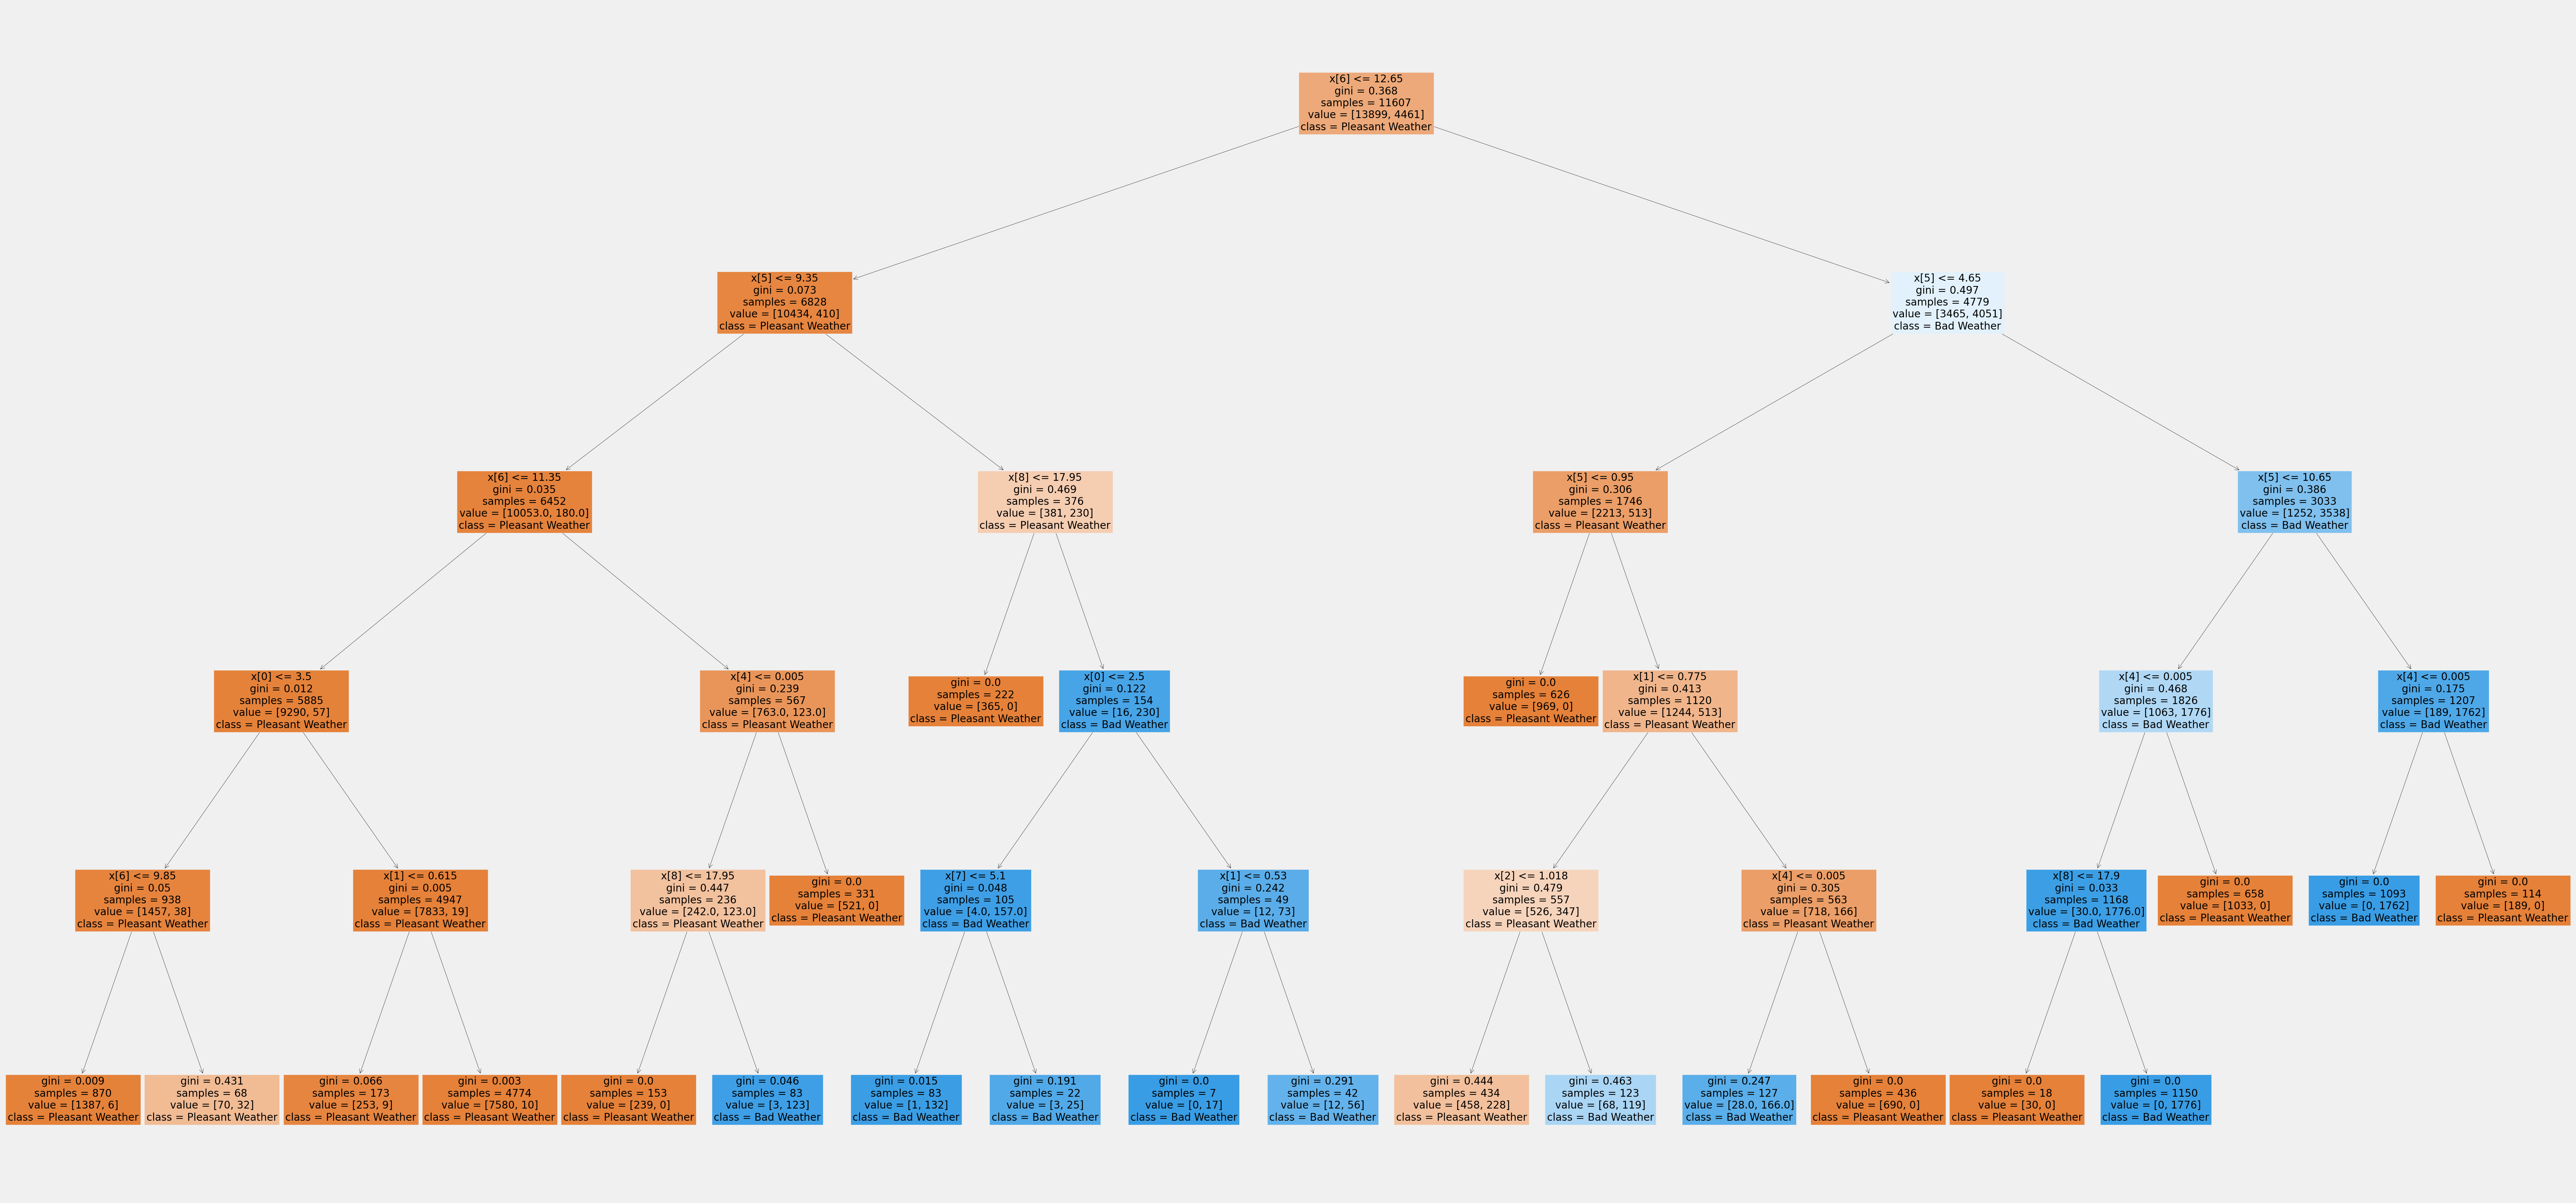

In [263]:
types = {0:'Pleasant Weather', 1:'Bad Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[10], fontsize = 20, class_names=types, filled=True);

In [264]:
fig.savefig(os.path.join(path2, 'Visual Assets', f'random_forest_{Station}_V2.png'),bbox_inches='tight')

# Finding Variable Importance  

In [265]:
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04847063, 0.01662436, 0.00581361, 0.12235023, 0.30742891,
       0.09176287, 0.12991626, 0.03281777, 0.24481536])

In [266]:
# Reshape newarray to match the expected shape (9 rows, 1 column)
newarray = newarray.reshape(9, 1)
newarray

array([[0.04847063],
       [0.01662436],
       [0.00581361],
       [0.12235023],
       [0.30742891],
       [0.09176287],
       [0.12991626],
       [0.03281777],
       [0.24481536]])

In [267]:
sumarray = newarray.reshape(9)
sumarray

array([0.04847063, 0.01662436, 0.00581361, 0.12235023, 0.30742891,
       0.09176287, 0.12991626, 0.03281777, 0.24481536])

In [268]:
# Extract column names that match the pattern 'BASEL_*'
observation_columns = [col for col in df_filtered.columns if col.startswith(Station)]

# Remove the station name prefix (e.g., 'BASEL_') from the column names
observation_names = [col.replace(f'{Station}_', '') for col in observation_columns]

# Print the observation names
print(observation_names)

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


In [269]:
# Create a DataFrame with the reshaped newarray and observation names
df_observation = pd.DataFrame(newarray, index=observation_names, columns=['Value'])

In [270]:
# Ensure the list of stations is ordered
observation_list = list(observation_names)

# Create a dictionary of stations and their corresponding values
observation_names = {observation_list[i]: newarray[i] for i in range(len(observation_list))}

# Convert the dictionary to a DataFrame
df_observation = pd.DataFrame(list(observation_names.items()), columns=['Observation', 'Value'])

# Extract values from the list inside the 'Value' column
df_observation['Value'] = df_observation['Value'].apply(lambda x: x[0])

df_observation

,Observation,Value
0,cloud_cover,0.048471
1,humidity,0.016624
2,pressure,0.005814
3,global_radiation,0.122350
4,precipitation,0.307429
5,sunshine,0.091763
6,temp_mean,0.129916
7,temp_min,0.032818
8,temp_max,0.244815


In [271]:
# Create observation_dict where each observation name gets the corresponding value from newarray
observation_dict = {obs: [value] for obs, value in zip(observation_names, newarray.flatten())}

# Create a DataFrame from the observation_dict, with 'Observation' and 'Value' columns
df_observations = pd.DataFrame(list(observation_dict.items()), columns=['Observation', 'Value'])

# Remove the list from the 'Value' column by accessing the first element
df_observations['Value'] = df_observations['Value'].apply(lambda x: x[0])

# Set 'Observation' as the index
df_observations.set_index('Observation', inplace=True)

# Display the transformed DataFrame as a Series
important = df_observations['Value']
print(important)


Observation
cloud_cover         0.048471
humidity            0.016624
pressure            0.005814
global_radiation    0.122350
precipitation       0.307429
sunshine            0.091763
temp_mean           0.129916
temp_min            0.032818
temp_max            0.244815
Name: Value, dtype: float64


In [272]:
# Check if lengths match
print(f"Length of observation_names: {len(observation_names)}")
print(f"Length of sumarray: {len(sumarray)}")

Length of observation_names: 9
Length of sumarray: 9


In [273]:
#important = pd.Series(newarray, index = observation_names)
#important = important.sort_values(ascending = False)
#important

In [274]:

observation_names = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']
observation_array = np.array(observation_names)

observation_array

array(['cloud_cover', 'humidity', 'pressure', 'global_radiation',
       'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'],
      dtype='<U16')

In [275]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Observations': observation_array,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending=False)
df_importance

,Observations,Importance
4,precipitation,0.307429
8,temp_max,0.244815
6,temp_mean,0.129916
3,global_radiation,0.122350
5,sunshine,0.091763
0,cloud_cover,0.048471
7,temp_min,0.032818
1,humidity,0.016624
2,pressure,0.005814


['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


Text(0.5, 1.0, 'Observations Importance, BASEL')

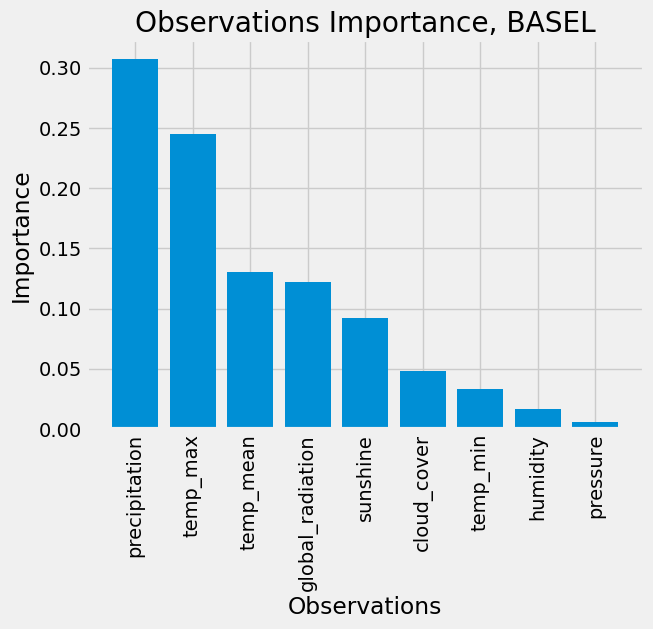

In [276]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(observation_names)

plt.bar(df_importance['Observations'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Observations')
plt.ylabel('Importance')
plt.title(f'Observations Importance, {Station}')